In [1]:
#|default_exp app

# Bearify

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

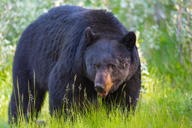

In [29]:
im = PILImage.create('Images/black.jpeg')
im.thumbnail((192,192))
im

In [5]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [6]:
#|export
learn = load_learner('bear_model.pkl')

In [7]:
learn.predict(im)

('teddy', tensor(2), tensor([1.0445e-04, 5.7532e-07, 9.9989e-01]))

In [26]:
#|export
categories = ('Black', 'Grizzly', 'Teddy')

def classify_image(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip(categories, map(float, probs)))

In [30]:
classify_image(im)

{'Black': 0.9999740123748779,
 'Grizzly': 2.554871025495231e-05,
 'Teddy': 4.94215839808021e-07}

In [31]:
#|export
image = gr.Image()
labels = gr.Label()
examples = ['Images/teddy.jpg', 'Images/grizzly.jpg', 'Images/black.jpeg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=labels, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


## Export

In [32]:
import nbdev
nbdev.export.nb_export('Bearify.ipynb', 'app')
print('Export successful')

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (C:\Users\utkar\prod_apps\Bearify\bear_env\lib\site-packages\nbdev\export.py)